# Hypothesis Testing

Two statistical tests will be conducted:

1. Comparison of total World Cup performance between UEFA and CONMEBOL teams  
2. Correlation between FIFA average ranking and total World Cup performance





## Test 1: UEFA vs CONMEBOL – Total Stage Score

**Objective:**  
To determine whether UEFA teams have historically achieved higher total stage scores in the FIFA World Cup compared to CONMEBOL teams.

**Hypotheses:**  
- **H₀**: CONMEBOL teams have equal or higher stage scores than UEFA teams.  
- **H₁**: UEFA teams have higher stage scores than CONMEBOL teams.

**Test Used:**  
Welch’s independent-samples t-test (unequal variances), **one-sided**.

In [1]:
import pandas as pd
from scipy.stats import ttest_ind


ts = pd.read_csv('output/team_stats.csv')


uefa = ts[ts['confed'] == 'UEFA']['sum_stage_score_full']
conm = ts[ts['confed'] == 'CONMEBOL']['sum_stage_score_full']

t_stat, p_val_two_sided = ttest_ind(uefa, conm, equal_var=False)


if t_stat > 0:
    p_val_one_sided = p_val_two_sided / 2
    
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)
  


print(f"Test statistic: t = {t_stat:.3f}")
print(f"One-sided p-value: {p_val_one_sided:.3f}")



Test statistic: t = -1.082
One-sided p-value: 0.847


### Boxplot: UEFA vs CONMEBOL Stage Scores

This visualization shows the distribution of total stage scores by confederation.


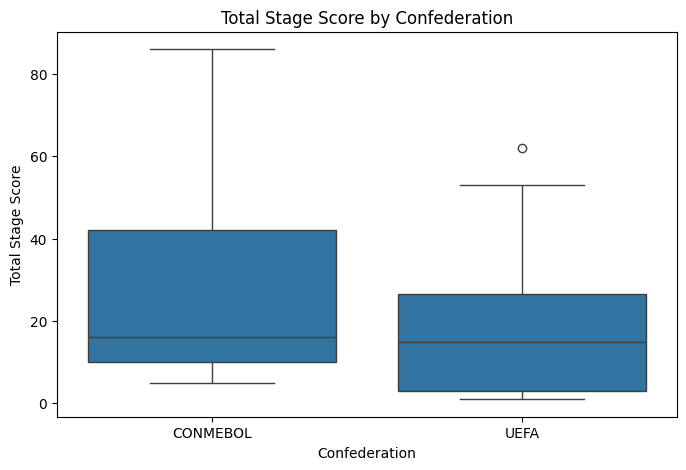

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=ts[ts['confed'].isin(['UEFA','CONMEBOL'])], x='confed', y='sum_stage_score_full')
plt.title('Total Stage Score by Confederation')
plt.xlabel('Confederation')
plt.ylabel('Total Stage Score')
plt.show()


**Conclusion:**  
The null hypothesis cannot be rejected.
With a test statistic of **t = –1.082** and a **one-sided p-value of 0.847**, there is no statistically significant evidence that UEFA teams have outperformed CONMEBOL teams in terms of total stage score.  
In fact, the negative t-value slightly favors CONMEBOL. This suggests that historically, UEFA teams have not demonstrated a clear superiority over CONMEBOL in cumulative World Cup performance.



## Test 2: Correlation Between FIFA Ranking and Stage Score

**Objective:**  
Evaluate whether a team’s average FIFA ranking correlates with their total World Cup success.
To evaluate whether a team's average FIFA ranking is associated with its performance in the FIFA World Cup (measured as total stage score from 1994 onward).

**Hypotheses:**  
- **H₀:** There is no monotonic correlation between average FIFA ranking and stage score.  
- **H₁:** There is a monotonic correlation.

**Test Used:** Spearman rank correlation.


In [3]:
from scipy.stats import spearmanr


cleaned = ts[['sum_stage_score_post94', 'avg_rank']].dropna()

rho, p_corr = spearmanr(cleaned['sum_stage_score_post94'], cleaned['avg_rank'])

print("Spearman correlation: sum_stage_score_post94 vs avg_rank")
print(f"rho = {rho:.3f}, p = {p_corr:.3f}")


Spearman correlation: sum_stage_score_post94 vs avg_rank
rho = -0.822, p = 0.000


### Scatter Plot: Stage Score vs. Average FIFA Ranking

The scatter plot below illustrates the relationship between average FIFA ranking and total World Cup performance.


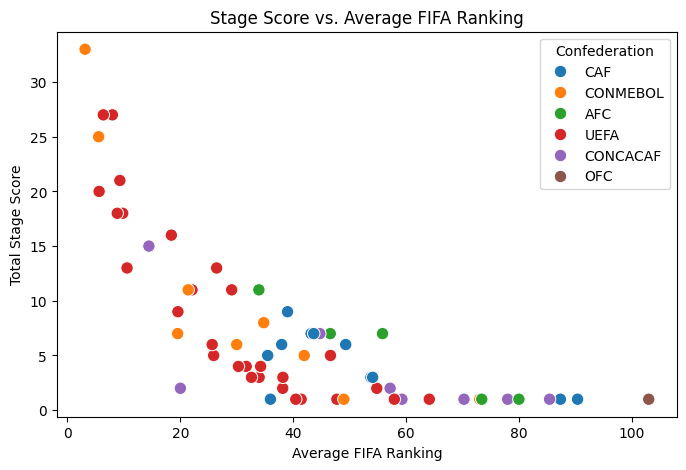

In [4]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=ts, x='avg_rank', y='sum_stage_score_post94', hue='confed', s=80)
plt.title('Stage Score vs. Average FIFA Ranking')
plt.xlabel('Average FIFA Ranking')
plt.ylabel('Total Stage Score')
plt.legend(title='Confederation')
plt.show()


**Conclusion:**  
The null hypothesis is rejected.
With a Spearman correlation of **ρ = -0.822** and **p < 0.001**, a very strong and statistically significant negative correlation is observed between a team’s average FIFA ranking and their total stage score (post-1994).  
This indicates that teams with consistently better FIFA rankings (lower values) tend to perform better in World Cups held since 1994.


